In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../6. Exploratory Data Analysis_ Data Visualization & Correlation/Salinan Online Retail Data.csv")

In [5]:
df.sample(5)

,order_id,product_code,product_name,quantity,order_date,price,customer_id
393286,533948,22835,HOT WATER BOTTLE I AM SO POORLY,1,2010-11-19 12:09:00,4.65,17346.0
296456,524982,84975,HEART SHAPED MIRROR,2,2010-10-01 15:28:00,1.69,12926.0
422647,536522,85231G,ORANGE SCENTED SET/9 T-LIGHTS,1,2010-12-01 12:49:00,0.85,15012.0
334514,528577,21670,BLUE SPOT CERAMIC DRAWER KNOB,12,2010-10-22 13:13:00,3.36,NaN
423840,536582,22534,MAGIC DRAWING SLATE SPACEBOY,24,2010-12-01 16:21:00,0.42,12947.0


In [6]:
df_clean = df.copy()
# membuat kolom date
df_clean['date'] = pd.to_datetime(df_clean['order_date']).dt.date
# menghapus semua baris tanpa product_name
df_clean = df_clean[~df_clean['product_name'].isna()]
# membuat semua product_name berhuruf kecil
df_clean['product_name'] = df_clean['product_name'].str.lower()
# menghapus semua baris dengan product_code atau product_name test
df_clean = df_clean[(~df_clean['product_code'].str.lower().str.contains('test')) |
                    (~df_clean['product_name'].str.contains('test '))]
# membuat kolom order_status dengan nilai 'cancelled' jika order_id diawali dengan huruf 'c' dan 'delivered' jika order_id tanpa awalan huruf 'c'
df_clean['order_status'] = np.where(df_clean['order_id'].str[:1]=='C', 'cancelled', 'delivered')
# mengubah nilai quantity yang negatif menjadi positif karena nilai negatif tersebut hanya menandakan order tersebut cancelled
df_clean['quantity'] = df_clean['quantity'].abs()
# menghapus baris dengan price bernilai negatif
df_clean = df_clean[df_clean['price']>0]
# membuat nilai amount, yaitu perkalian antara quantity dan price
df_clean['amount'] = df_clean['quantity'] * df_clean['price']
# mengganti product_name dari product_code yang memiliki beberapa product_name dengan salah satu product_name-nya yang paling sering muncul
most_freq_product_name = df_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df_clean['product_name'] = df_clean['most_freq_product_name']
df_clean = df_clean.drop(columns='most_freq_product_name')
# mengkonversi customer_id menjadi string
df_clean['customer_id'] = df_clean['customer_id'].astype(str)
# menghapus outlier
from scipy import stats
df_clean = df_clean[(np.abs(stats.zscore(df_clean[['quantity','amount']]))<3).all(axis=1)]
df_clean = df_clean.reset_index(drop=True)
df_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,order_status,amount
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590.0,2010-01-04,cancelled,4.25
1,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,nan,2010-01-04,delivered,0.85
2,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,nan,2010-01-04,delivered,3.75
3,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,nan,2010-01-04,delivered,0.85
4,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01-04,delivered,91.80
...,...,...,...,...,...,...,...,...,...,...
455491,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,nan,2010-12-23,delivered,1.25
455492,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,nan,2010-12-23,delivered,5.80
455493,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,nan,2010-12-23,delivered,3.75
455494,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,nan,2010-12-23,delivered,1.25


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455496 entries, 0 to 455495
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      455496 non-null  object 
 1   product_code  455496 non-null  object 
 2   product_name  455496 non-null  object 
 3   quantity      455496 non-null  int64  
 4   order_date    455496 non-null  object 
 5   price         455496 non-null  float64
 6   customer_id   455496 non-null  object 
 7   date          455496 non-null  object 
 8   order_status  455496 non-null  object 
 9   amount        455496 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 34.8+ MB


In [ ]:
pd.pivot_table(df_clean,
               index="date",
               columns="order_status",
               values=["order_id", "amount"],
               aggfunc={
                   "order_id": pd.Series.nunique,
                   "amount": np.sum
               },
               fill_value=0
)

amount            order_id          
order_status cancelled delivered cancelled delivered
date                                                
2010-01-04      250.36   7866.41        11        26
2010-01-05       96.95  15529.29         4        33
2010-01-06        0.00   7430.34         0        13
2010-01-07      649.87  17506.10        32        40
2010-01-08       21.90  13404.25         1        36
...                ...       ...       ...       ...
2010-12-19       17.60   6653.94         2        21
2010-12-20      986.42  21149.55        24        54
2010-12-21      206.15  24229.66        10        47
2010-12-22       65.40   3690.45         5        13
2010-12-23      207.85   9767.24         8        24

[298 rows x 4 columns]

In [11]:
df_status_summary = df_clean.groupby('order_status', as_index=False).agg(order_cnt=('order_id','nunique'),total_amount=('amount','sum'))
df_status_summary

,order_status,order_cnt,total_amount
0,cancelled,3746,158184.030
1,delivered,17925,6932842.013


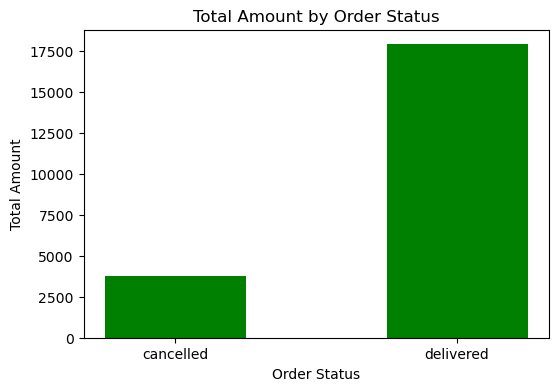

In [15]:
fig = plt.figure(figsize=(6, 4))
plt.bar(
    df_status_summary["order_status"],
    df_status_summary["order_cnt"],
    color="green",
    width=0.5
)
plt.xlabel("Order Status")
plt.ylabel("Total Amount")
plt.title("Total Amount by Order Status")
plt.show()

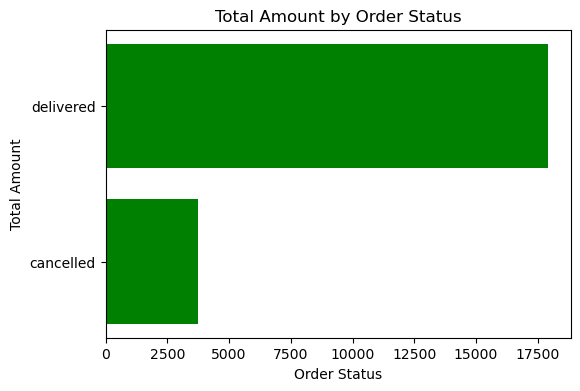

In [17]:
fig = plt.figure(figsize=(6, 4))
plt.barh(
    df_status_summary["order_status"],
    df_status_summary["order_cnt"],
    color="green"
)
plt.xlabel("Order Status")
plt.ylabel("Total Amount")
plt.title("Total Amount by Order Status")
plt.show()

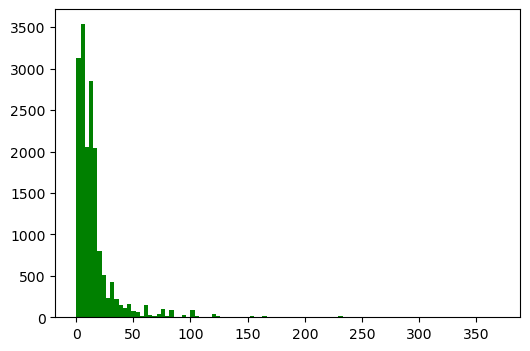

In [21]:
fig = plt.figure(figsize=(6, 4))
plt.hist(
    df_clean.loc[df_clean["product_name"].str.contains("tea")]["amount"],
    bins=100,
    color="green"
)
plt.show()

In [22]:
df_date_summary = df_clean.groupby('date', as_index=False).agg(order_cnt=('order_id','nunique'))
df_date_summary

,date,order_cnt
0,2010-01-04,37
1,2010-01-05,37
2,2010-01-06,13
3,2010-01-07,72
4,2010-01-08,37
...,...,...
293,2010-12-19,23
294,2010-12-20,78
295,2010-12-21,57
296,2010-12-22,18


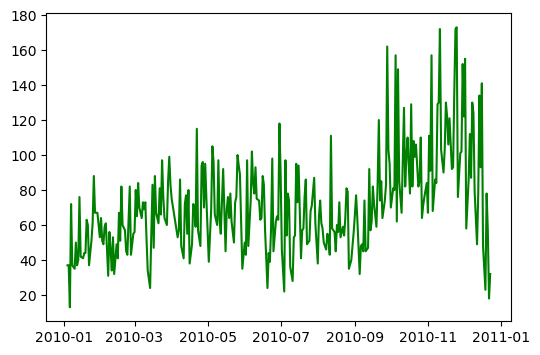

In [23]:
fig = plt.figure(figsize=(6, 4))
plt.plot(
    "date",
    "order_cnt",
    data=df_date_summary,
    color="green",
    linestyle="-"
)
plt.show()

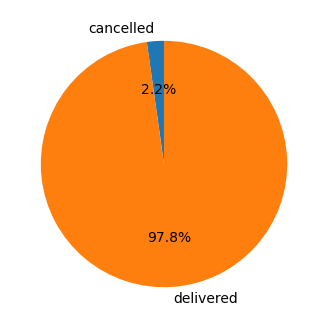

In [24]:
fig = plt.figure(figsize=(6, 4))
plt.pie(df_status_summary["total_amount"],
        labels=df_status_summary["order_status"],
        startangle=90,
        autopct="%1.1f%%"
        )
plt.show()

In [25]:
df_tea_only = df_clean[df_clean['product_name'].str.contains('tea')]
df_tea_only

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,order_status,amount
8,493414,21527,red retrospot traditional teapot,12,2010-01-04 10:28:00,6.95,14590.0,2010-01-04,delivered,83.40
10,C493415,21527,red retrospot traditional teapot,3,2010-01-04 10:33:00,7.95,14590.0,2010-01-04,cancelled,23.85
20,493427,79000,moroccan tea glass,12,2010-01-04 10:43:00,0.85,13287.0,2010-01-04,delivered,10.20
56,C493430,21527,red retrospot traditional teapot,1,2010-01-04 11:43:00,7.95,14680.0,2010-01-04,cancelled,7.95
100,493432,22072,red retrospot tea cup and saucer,2,2010-01-04 12:30:00,3.75,14680.0,2010-01-04,delivered,7.50
...,...,...,...,...,...,...,...,...,...,...
455138,539958,22481,black tea towel classic design,3,2010-12-23 13:26:00,0.85,nan,2010-12-23,delivered,2.55
455196,539958,22900,set 2 tea towels i love london,1,2010-12-23 13:26:00,5.91,nan,2010-12-23,delivered,5.91
455467,539988,47559B,tea time oven glove,2,2010-12-23 16:06:00,1.25,18116.0,2010-12-23,delivered,2.50
455485,539991,22891,tea for one polkadot,1,2010-12-23 16:49:00,4.25,nan,2010-12-23,delivered,4.25


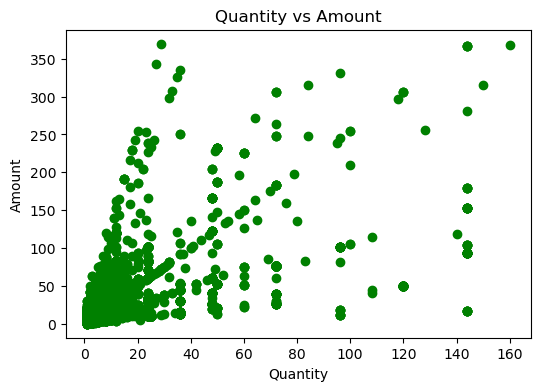

In [ ]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(
    df_tea_only["quantity"],
    df_tea_only["amount"],
    color="green",
    marker="o",
)
plt.xlabel("Quantity")
plt.ylabel("Amount")
plt.title("Quantity vs Amount")
plt.show()

<Figure size 600x400 with 0 Axes>

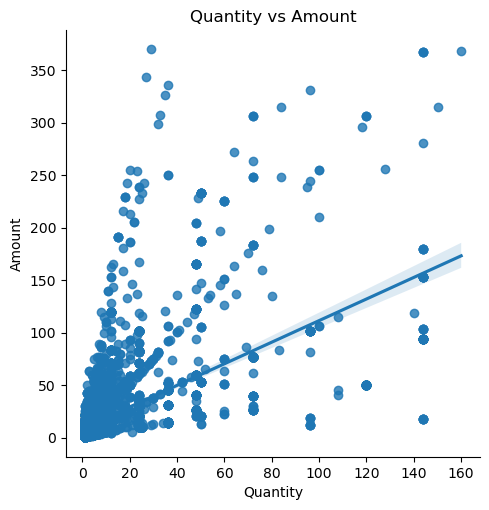

In [29]:
fig = plt.figure(figsize=(6, 4))
sns.lmplot(
    x="quantity",
    y="amount",
    data=df_tea_only,
    fit_reg=True
)
plt.xlabel("Quantity")
plt.ylabel("Amount")
plt.title("Quantity vs Amount")
plt.show()

<Axes: xlabel='order_status', ylabel='amount'>

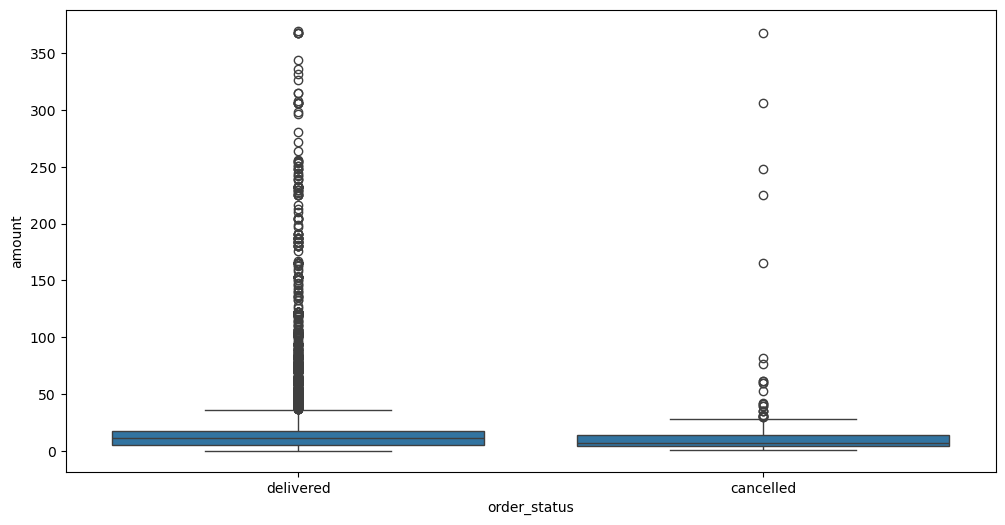

In [32]:
fig = plt.figure(figsize=(12, 6))
sns.boxplot(
    x="order_status",
    y="amount",
    data=df_tea_only
)

<Axes: >

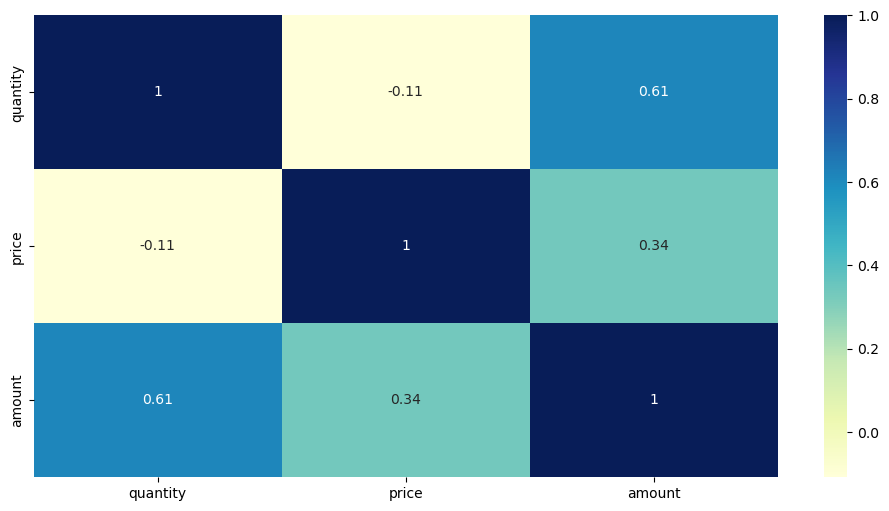

In [35]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(
    df_clean.corr(numeric_only=True), 
    cmap="YlGnBu", 
    annot=True
)